In [ ]:
# pip install seaborn

In [ ]:
# pip install scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
## CSV method

#import dependencies & setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pygwalker as pyg
import seaborn as sns
from pathlib import Path
from scipy import stats
%matplotlib inline


# file to load 
historical_sea_level_to_load = Path("Resources/sea-level-rise-historical.csv")
predictions_sea_level_to_load = Path("Resources/sea-level-rise-predictions.csv")

# read CSV
sealevelrise_data_historical = pd.read_csv(historical_sea_level_to_load)
sealevelrise_data_predictions = pd.read_csv(predictions_sea_level_to_load)

# convert to pandas df
slr_data_historical = pd.DataFrame(sealevelrise_data_historical)
slr_data_predictions = pd.DataFrame(sealevelrise_data_predictions)



### CSIRO (Commonwealth Scientific and Industrial Research Organization) Data 
 This data contains “cumulative changes in sea level for the world’s oceans since 1880, based on a combination of long-term tide gauge measurements and recent satellite measurements. It shows average absolute sea level change, which refers to the height of the ocean surface, regardless of whether nearby land is rising or falling. The data is recorded in centimeters.

In [ ]:
# historical global avg sea level rise in cm
slr_data_historical.head()

In [ ]:
# predicted global avg sea level rise in cm
slr_data_predictions.head()

## Sea Level Rise Tables

### Historical Global Sea Level Rise 

In [ ]:
plt.plot(slr_data_historical['Year'], slr_data_historical['CSIRO - Adjusted sea level (cm)'], marker=',', linestyle='-', color='b', label='Sea Level Rise', animated=True)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('SLR in cm')
plt.title('Global Historical Sea Level Rise by Year (in cm)')

# Add legend
plt.legend()

# Display the graph
plt.show()


### Predictions Global Sea Level Rise 
- Ten cities: New York, Seattle, Halifax, Wilmington, North Sydney, Lautoka, Tuxpan, Miami Beach, Kapingamarangi, Yakutat

In [ ]:
### Predictions Global SLR - 10 cities

# Get a list of all of our columns for easy reference
slr_data_predictions.columns

In [ ]:
# Define the specific Latitude and Longitude values
target_latitudes = [40.7, 47.6, 44.67, 34.23, 46.22, -17.6, 21, 25.77, 1.1, 59.55]
target_longitudes = [-74.01, -122.34, -63.58, -77.95, -60.25, 177.44, -97.33, -80.13, 154.78, -139.73]

# Create a condition to filter rows based on specified Latitudes and Longitudes
condition = (slr_data_predictions['Latitude'].isin(target_latitudes)) & \
            (slr_data_predictions['Longitude'].isin(target_longitudes))

# Select the desired columns and rows based on the condition
selected_columns = ['Site', 'Scenario', 'Latitude', 'Longitude', 
                    'Background RSL rate (mm/yr)', 'RSL in 2000 (cm)', 
                    'RSL in 2010 (cm)', 'RSL in 2020 (cm)', 'RSL in 2030 (cm)', 
                    'RSL in 2040 (cm)', 'RSL in 2050 (cm)', 'RSL in 2060 (cm)', 
                    'RSL in 2070 (cm)', 'RSL in 2080 (cm)', 'RSL in 2090 (cm)', 
                    'RSL in 2100 (cm)', 'RSL in 2120 (cm)', 'RSL in 2150 (cm)', 
                    'RSL in 2200 (cm)']

select_cities_preddf = slr_data_predictions.loc[condition, selected_columns]
select_cities_preddf.head()

# select_cities_preddf.to_csv('../../Resources/tencities_slr_prediction.csv')


In [ ]:
# pyg.walk(select_cities_preddf)

## Sea Level Rise Predictions

In [ ]:
# Rows for which you want to calculate the average

# 1. NEW YORK
newyork_rows = select_cities_preddf.iloc[0:18]
# newyork_rows
newyork_meandata = newyork_rows.mean()
# newyork_meandata

# 2. HALIFAX
halifax_rows = select_cities_preddf.iloc[18:36]
# halifax_rows
halifax_meandata = halifax_rows.mean()
# halifax_meandata

# 3. SEATTLE
seattle_rows = select_cities_preddf.iloc[36:54]
# seattle_rows
seattle_meandata = seattle_rows.mean()
# seattle_meandata

# 4. MIAMI BEACH
miamibeach_rows = select_cities_preddf.iloc[54:72]
# miamibeach_rows
miamibeach_meandata = miamibeach_rows.mean()
# miamibeach_meandata

# 5. WILMINGTON
wilmington_rows = select_cities_preddf.iloc[72:90]
# wilmington_rows
wilmington_meandata = wilmington_rows.mean()
# wilmington_meandata

# 6. YAKUTAT
yakutat_rows = select_cities_preddf.iloc[90:108]
# yakutat_rows
yakutat_meandata = yakutat_rows.mean()
# yakutat_meandata

# 7. TUXPAN
tuxpan_rows = select_cities_preddf.iloc[108:126]
# tuxpan_rows
tuxpan_meandata = tuxpan_rows.mean()
# tuxpan_meandata

# 8. NORTH SYDNEY
northsydney_rows = select_cities_preddf.iloc[126:144]
# northsydney_rows
northsydney_meandata = northsydney_rows.mean()
# northsydney_meandata

# 9. KAPINGAMARANGI
kapingamarangi_rows = select_cities_preddf.iloc[144:162]
# kapingamarangi_rows
kapingamarangi_meandata = kapingamarangi_rows.mean()
# kapingamarangi_meandata

# 10. LAUTOKA
lautoka_rows = select_cities_preddf.iloc[162:180]
# lautoka_rows
lautoka_meandata = lautoka_rows.mean()
# lautoka_meandata
# type(lautoka_meandata)


# create a df using all the averages for the cities
tencities_slr_dict = {
    'New York': newyork_meandata, 
    'Seattle': seattle_meandata,
    'Halifax': halifax_meandata, 
    'Wilmington': wilmington_meandata, 
    'North Sydney': northsydney_meandata,
    'Lautoka': lautoka_meandata,
    'Tuxpan': tuxpan_meandata,
    'Miami Beach': miamibeach_meandata,
    'Kapingamarangi': kapingamarangi_meandata, 
    'Yakutat': yakutat_meandata
}

tencities_meanslr = pd.DataFrame(tencities_slr_dict)
tencities_meanslr

In [ ]:
# Transpose the DataFrame using .transpose() method
global_meanslr = tencities_meanslr.transpose()
global_meanslr

# print("Original DataFrame:")
# print(global_meanslr_predic)

# print("\nTransposed DataFrame:")
# print(global_meanslr_predic)

# save as PDF
# global_meanslr.to_csv('../../Resources/global_meanslr_predictions.csv')

In [ ]:
# Rename index column to 'Cities'
# global_meanslr_predic = global_meanslr.rename(columns={'City': ''}, index={'ONE': 'Row_1'})
# global_meanslr_predic


## Global Historical Sea Level Rise - Regression Model
Comparing predictions made from EPA Historical data, to that of NASA predictions.

In [ ]:
# SLR Historical
slr_data_historical.info()

In [ ]:
# rename  1   CSIRO - Adjusted sea level (cm)  column
slr_data_historical.rename(columns={'CSIRO - Adjusted sea level (cm)': 'SLR-hist'}, inplace=True)
print("\nAfter modifying first column:\n", slr_data_historical.columns)

<Axes: xlabel='Year', ylabel='SLR-hist'>

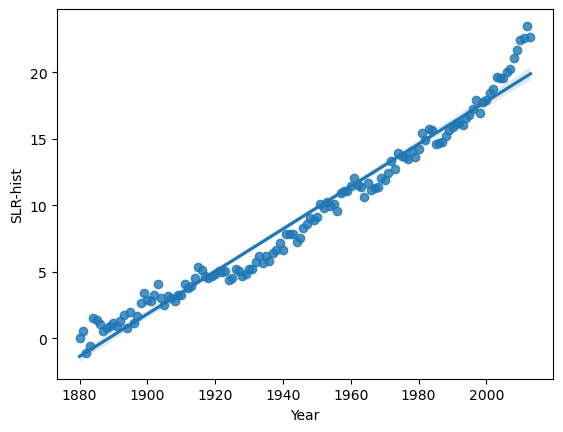

In [60]:
# first method
sns.regplot(x= 'Year', y= "SLR-hist", data=slr_data_historical)

In [ ]:
# visualize the modified df
slr_data_historical

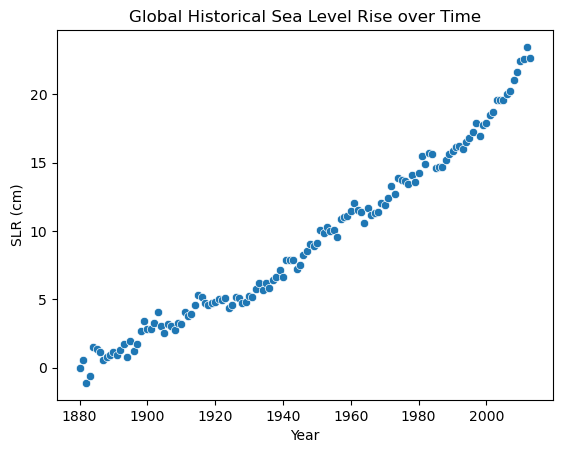

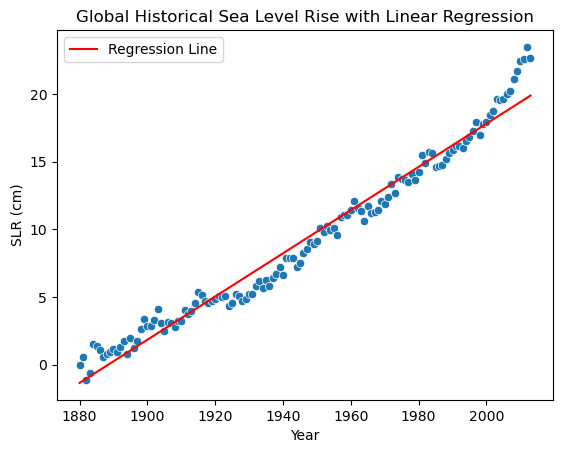

Intercept: -301.606651975083
Coefficient: 0.15970640515672263


In [61]:
# Remove rows with missing values in SLR-hist
df_cleaned = slr_data_historical.dropna(subset=['SLR-hist'])

# visualize using Seaborn
sns.scatterplot(data=df_cleaned, x='Year', y='SLR-hist')
plt.title('Global Historical Sea Level Rise over Time')
plt.xlabel('Year')
plt.ylabel('SLR (cm)')
plt.show()

# Perform linear regression using Scikit-Learn
X = df_cleaned[['Year']]
y = df_cleaned['SLR-hist']
regressor = LinearRegression()
regressor.fit(X, y)

# Visualize the regression line and scatter plot using Seaborn
sns.scatterplot(data=df_cleaned, x='Year', y='SLR-hist')
plt.plot(X, regressor.predict(X), color='red', label='Regression Line')
plt.title('Global Historical Sea Level Rise with Linear Regression')
plt.xlabel('Year')
plt.ylabel('SLR (cm)')
plt.legend()
plt.show()

# Print the regression coefficients
print("Intercept:", regressor.intercept_)
print("Coefficient:", regressor.coef_[0])

In [ ]:
# slr_data_historical
# drop NaN to execure linear regression
slr_data_hXclean = slr_data_historical.dropna()
# slr_data_hXclean

In [62]:
#regression
# 1. create instance
lri = LinearRegression()

# 2. Train model
lri.fit(slr_data_hXclean[['Year']].values, slr_data_hXclean['SLR-hist'])

LinearRegression()

In [63]:
# predicting 2050 global SLR
lri.predict([[2050]])

array([36.11815582])

In [64]:
# predicting 2100 global SLR
lri.predict([[2100]])

array([53.90646751])